<a href="https://colab.research.google.com/github/Nag1361/ai/blob/main/AIML_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin

# Setting Seaborn style for better visuals
sns.set()


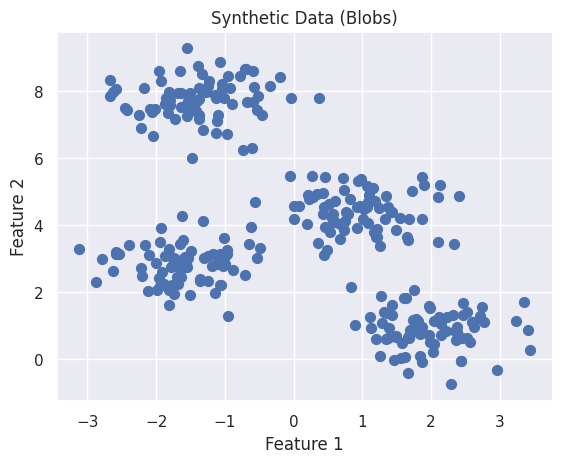

In [2]:
# Creating synthetic dataset using make_blobs
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Plotting the synthetic data
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("Synthetic Data (Blobs)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


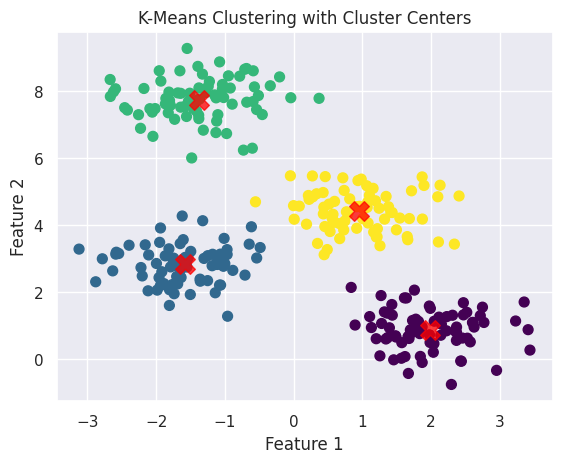

In [3]:
# Importing KMeans from sklearn and fitting the data
kmeans = KMeans(n_clusters=4)  # Setting the number of clusters to 4
kmeans.fit(X)  # Fitting the K-Means model

# Getting the cluster centers and labels
centers = kmeans.cluster_centers_
labels = kmeans.labels_

# Visualizing the data with cluster labels
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title("K-Means Clustering with Cluster Centers")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


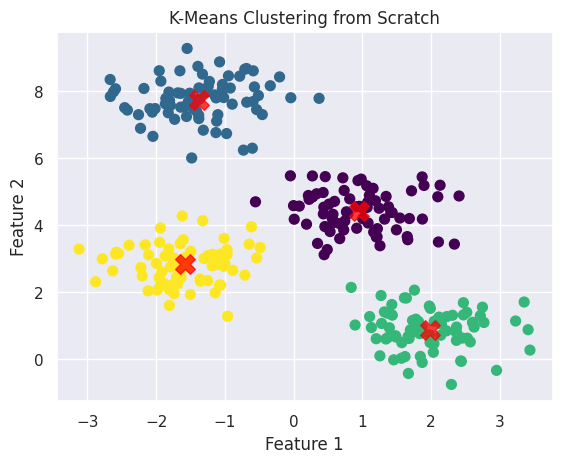

In [4]:
# Function to implement K-Means Clustering from scratch
def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]

    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)

        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)])

        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers

    return centers, labels

# Using the custom K-Means function
centers, labels = find_clusters(X, 4)

# Plotting the results
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title("K-Means Clustering from Scratch")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


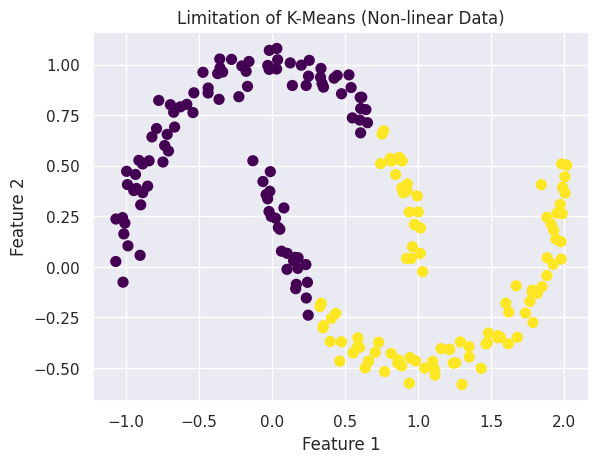

In [5]:
# Creating a synthetic dataset with non-linear structure (make_moons)
from sklearn.datasets import make_moons
X_moons, y_moons = make_moons(200, noise=0.05, random_state=0)

# Fitting K-Means to non-linear data
labels_moons = KMeans(2, random_state=0).fit_predict(X_moons)

# Plotting the result for the non-linear data
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=labels_moons, s=50, cmap='viridis')
plt.title("Limitation of K-Means (Non-linear Data)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


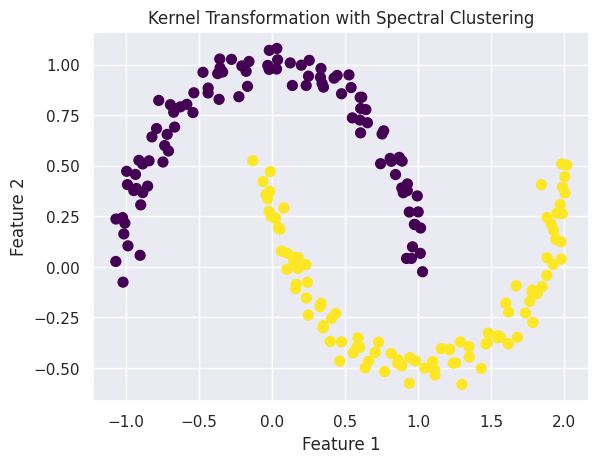

In [6]:
# Importing Spectral Clustering
from sklearn.cluster import SpectralClustering

# Applying Spectral Clustering to non-linear data
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans')
labels_spectral = model.fit_predict(X_moons)

# Plotting Spectral Clustering results
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=labels_spectral, s=50, cmap='viridis')
plt.title("Kernel Transformation with Spectral Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
